In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import HTML

In [21]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (13, 7)

In [22]:
def plotPath(df, i):
    s=df.path[i]
    a=[int(i) for i in s.split(';')]
    return a

## Exercise 9.01 ##
The travelling salesman problem is a classical problem in combinatorial optimization. From a mathematical perspective we are trying to find the shortest hamiltonian path on a simply connected graph, i.e. the shortest path that touches all the edges exactly once. It's a NP-hard problem, and is therefore widely studied and no known algorithm gives the exact solutions, aside from the brute-force method.

In this exercise we are required to use genetic algorithms to find an optimal solution to the salesman problem: we generate a population of $N$ candidate solutions, we test them, we create a bucket that contains a higher number of the "good" ones (perhaps we should say the fittest), we mutate and cross them, and then we repeat the same process with the new population. If our algorithm is efficient after some generation we should find a optimal solution.

Given that the problem is not NP, we can't know if our algorithm found the optimal solution. Instead, to test the algorithm we have to use an easy configuration of the city: if we distribute the cities on a circumference we should expect the algorithm to draw a circular path.

Every solution can be mutated in different ways:
- by permuting a pair
- by shifting some cities in the path
- by permuting two blocks
- by reversing a block
The different mutations are independent event: when we talk about the probability of mutation we are referring to the probability that each mutation occurs.

At first we tested the algorithm for $1000$ generations of $N=100$ solutions, at every round the probability of mutation is $0.45$ and at every generation is constructed by sorting the population and choosing $100$ new solutions by picking the $i$-th with probability:
$$p(i)=N\text{floor}(1-n^{0.1})$$
where $n$ is a random number uniformly distributed in $[0,1]$.
All the distances are obtained by using the $L^2$ norm

In [23]:
dfCitySquare=pd.read_csv(r'mutationOnlyData/citySquare.csv');
dfPathSquare=pd.read_csv(r'mutationOnlyData/pathSquare.csv');
dfCityCircle=pd.read_csv(r'mutationOnlyData/cityCircle.csv');
dfPathCircle=pd.read_csv(r'mutationOnlyData/pathCircle.csv');

In [24]:
%%capture
gens=dfPathSquare.gen[:350:5]
fig, axis = plt.subplots(1,2)
def updateFig(i):
    axis[0].clear()
    path=plotPath(dfPathSquare, i)
    axis[0].plot(dfCitySquare.x[path],dfCitySquare.y[path])
    axis[0].scatter(dfCitySquare.x,dfCitySquare.y, marker='*', color='red')
    axis[0].set_aspect('equal')
    axis[0].set_title(f'Generation {i}')
    
    axis[1].clear()
    path=plotPath(dfPathCircle, i)
    axis[1].plot(dfCityCircle.x[path],dfCityCircle.y[path])
    axis[1].scatter(dfCityCircle.x,dfCityCircle.y, marker='*', color='red')
    axis[1].set_aspect('equal')
    axis[1].set_title(f'Generation {i}')

In [25]:
anim = animation.FuncAnimation(fig, updateFig,frames=gens, interval=1000)
HTML(anim.to_html5_video())


As we can see this already gives us a reasonable solution. What we are really doing here is a magnified random walk in the space of the solutions, and it gives us the correct answer in a simple case and a reasonable answer in a more complex situations(as already stated, we can't know for sure if this is the correct solution). 

In the next block we see the result obatined by introducing a crossover between the chromosomes: each chromosome has a probability of $0.5$ of having a cross over with another chromosome. The probability of mutation is now set to $0.10$.

In [26]:
dfCitySquare=pd.read_csv(r'Data/citySquare.csv');
dfPathSquare=pd.read_csv(r'Data/pathSquare.csv');
dfCityCircle=pd.read_csv(r'Data/cityCircle.csv');
dfPathCircle=pd.read_csv(r'Data/pathCircle.csv');

In [27]:
%%capture
gens=dfPathSquare.gen[:500:5]
fig, axis = plt.subplots(1,2)
def updateFig(i):
    axis[0].clear()
    path=plotPath(dfPathSquare, i)
    axis[0].plot(dfCitySquare.x[path],dfCitySquare.y[path])
    axis[0].scatter(dfCitySquare.x,dfCitySquare.y, marker='*', color='red')
    axis[0].set_aspect('equal')
    axis[0].set_title(f'Generation {i}, length:{dfPathSquare.length[i]:.2f}')
    
    axis[1].clear()
    path=plotPath(dfPathCircle, i)
    axis[1].plot(dfCityCircle.x[path],dfCityCircle.y[path])
    axis[1].scatter(dfCityCircle.x,dfCityCircle.y, marker='*', color='red')
    axis[1].set_aspect('equal')
    axis[1].set_title(f'Generation {i}, length:{dfPathCircle.length[i]:.2f}')
    plt.tight_layout()

In [28]:
anim = animation.FuncAnimation(fig, updateFig,frames=gens, interval=1000)
HTML(anim.to_html5_video())

<Figure size 936x504 with 0 Axes>

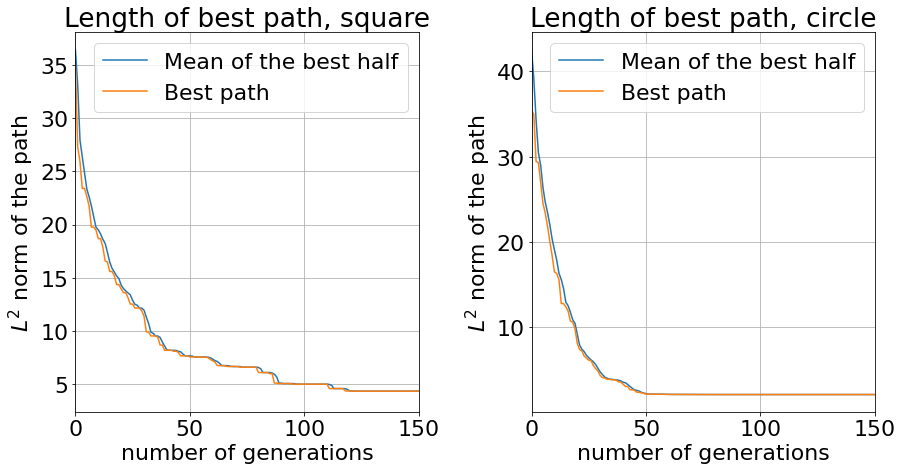

In [29]:
dfCitySquare=pd.read_csv(r'Data/citySquare.csv');
dfPathSquare=pd.read_csv(r'Data/pathSquare.csv');
dfCityCircle=pd.read_csv(r'Data/cityCircle.csv');
dfPathCircle=pd.read_csv(r'Data/pathCircle.csv');

fig, axis = plt.subplots(1,2)
axis[0].plot(dfPathSquare.meanLength, label="Mean of the best half")
axis[0].plot(dfPathSquare.length, label="Best path")
axis[0].set_ylabel(r'$L^2$ norm of the path')
axis[0].set_xlabel(r'number of generations')
axis[0].legend()
axis[0].set_xlim([0,150])
axis[0].grid()
axis[0].set_title("Length of best path, square")


axis[1].plot(dfPathCircle.meanLength, label="Mean of the best half")
axis[1].plot(dfPathCircle.length, label="Best path")
axis[1].set_ylabel(r'$L^2$ norm of the path')
axis[1].set_xlabel(r'number of generations')
axis[1].legend()
axis[1].grid()
axis[1].set_xlim([0,150])
axis[1].set_title("Length of best path, circle");
plt.tight_layout()

An important observation is the fact that the mean length is almost equal to the best length. This suggest us that our selection of the best fit is very selective. Obviously every parameter must be tuned for the specific problem, and in this case we don't have any problem, but in other contexts this could limit the dimension of the solution space that we are sampling.

We can now try to tackle an harder problem: can our algorithm find a good hamiltonian path with a set of $100$ city? We tried to do so, by using the same setup as before and increasing the population size to $1000$ and this is the result:

In [30]:
dfCitySquare100=pd.read_csv(r'Data/city100.csv');
dfPathSquare100=pd.read_csv(r'Data/path100.csv');

In [33]:
%%capture
gens=dfPathSquare100.gen[::5]
fig, axis = plt.subplots(1)
def updateFig(i):
    axis.clear()
    path=plotPath(dfPathSquare100, i)
    axis.plot(dfCitySquare100.x[path],dfCitySquare100.y[path])
    axis.scatter(dfCitySquare100.x,dfCitySquare100.y, marker='*', color='red')
    axis.set_aspect('equal')
    axis.set_title(f'Generation {i}, length {dfPathSquare100.length[i]}')
    

In [34]:
anim = animation.FuncAnimation(fig, updateFig,frames=gens, interval=1000)
HTML(anim.to_html5_video())

Text(0.5, 1.0, 'Length of best path, square')

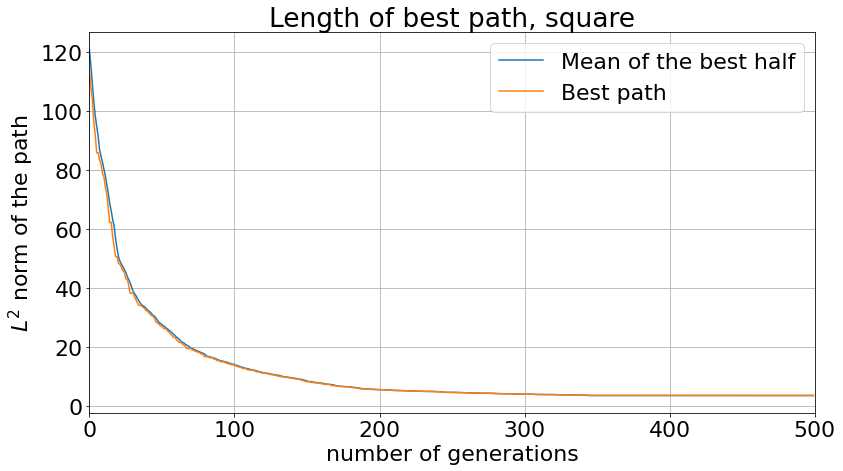

In [35]:
fig, axis = plt.subplots(1,1)
axis.plot(dfPathSquare100.meanLength, label="Mean of the best half")
axis.plot(dfPathSquare100.length, label="Best path")
axis.set_ylabel(r'$L^2$ norm of the path')
axis.set_xlabel(r'number of generations')
axis.legend()
axis.grid()
plt.xlim([0,500])
axis.set_title("Length of best path, square")

We have the same feature as before: the solutions quickly becomes the same after every upgrade. 
We can even try to go further, and see if we can find the shortest hamiltonian path for a set of $500$ cities uniformly distributed in a square. The population size is still $10^3$ and the parameters have changed: the probability of every mutation is still $0.1$, the probability of a cross over is $0.45$, and the probability of picking the $i$-th member of the population while reproducing the population is:
$$p(i)=N\lfloor 1-n^{0.3}\rfloor$$

In [36]:
dfCitySquare500=pd.read_csv(r'./Data/city500.csv');
dfPathSquare500=pd.read_csv(r'./Data/path500.csv');

Text(0, 0.5, '$L^2$ norm of the best length path')

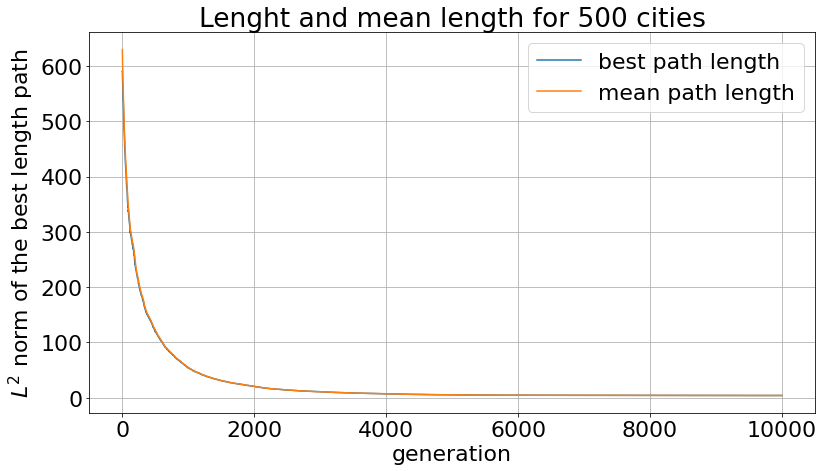

In [37]:
plt.plot(dfPathSquare500.length, label='best path length')
plt.plot(dfPathSquare500.meanLength, label='mean path length')
plt.grid()
plt.title('Lenght and mean length for 500 cities')
plt.xlabel('generation')
plt.legend()
plt.ylabel(r'$L^2$ norm of the best length path')

In [38]:
%%capture
gens=dfPathSquare500.gen[::50]
fig, axis = plt.subplots(1,1)
def updateFig(i):
    axis.clear()
    path=plotPath(dfPathSquare500, i)
    axis.plot(dfCitySquare500.x[path],dfCitySquare500.y[path])
    axis.scatter(dfCitySquare500.x,dfCitySquare500.y, marker='*', color='red')
    axis.set_aspect('equal')
    axis.set_title(f'Generation {i}, length: {dfPathSquare500.length[i]}')
    axis.grid()

In [39]:
anim = animation.FuncAnimation(fig, updateFig,frames=gens, interval=1000)
HTML(anim.to_html5_video())

It takes some  and some computational power, but it is a nice result.
## Conclusions ##

What we presented is a naive implementation of the genetic algorithms: the literature on the subject is astounding, and this is the tip of the iceberg. But the results contained in this notebook show the power and the flexibility of the genetic algorithms. The main limitation is the scalability: as the input increases in size, the number of generation required becomes bigger and the time required grow exponentially. We don't have any quantitaive data, but up to 100 cities just a few seconds are required, while in the 500 cities case it takes hours.
